In [2]:
import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['message'] = df['message'].apply(clean_text)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Convert labels


In [5]:
X = df['message']
y = df['label']

vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9748878923766816
Confusion Matrix:
 [[962   3]
 [ 25 125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.98      0.83      0.90       150

    accuracy                           0.97      1115
   macro avg       0.98      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



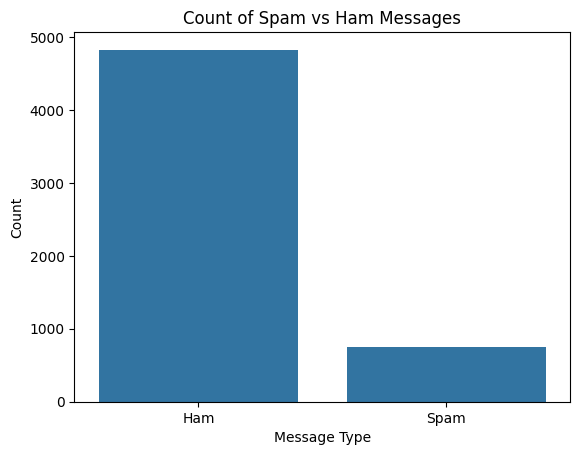

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title("Count of Spam vs Ham Messages")
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()


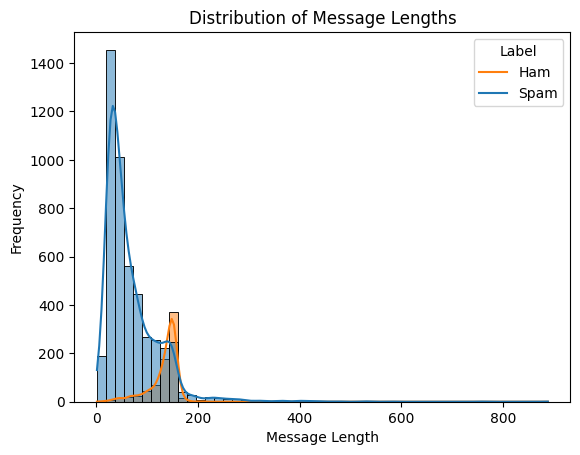

In [9]:
df['message_length'] = df['message'].apply(len)

sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True)
plt.title("Distribution of Message Lengths")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.legend(title='Label', labels=['Ham', 'Spam'])
plt.show()


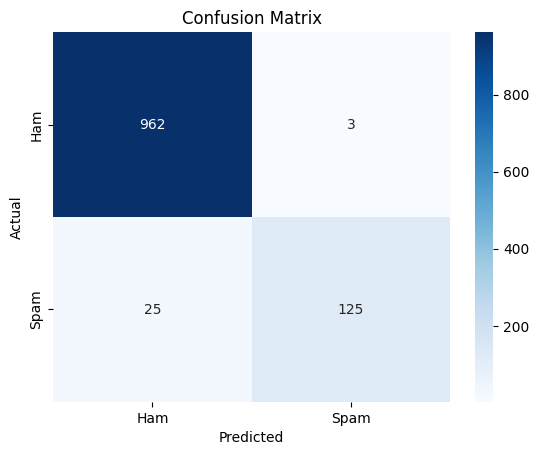

In [10]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


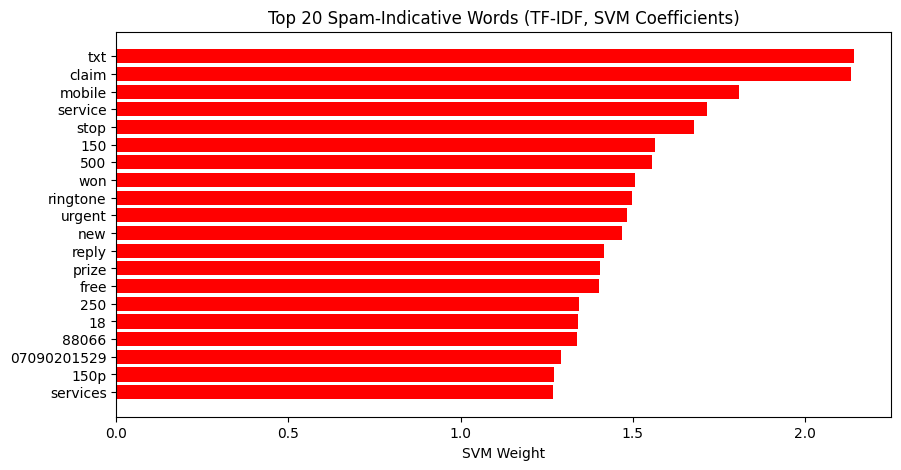

In [11]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]

top_positive = np.argsort(coefs)[-20:]  # spam-indicative
top_negative = np.argsort(coefs)[:20]   # ham-indicative

plt.figure(figsize=(10, 5))
plt.barh(range(20), coefs[top_positive], color='red')
plt.yticks(range(20), [feature_names[i] for i in top_positive])
plt.title("Top 20 Spam-Indicative Words (TF-IDF, SVM Coefficients)")
plt.xlabel("SVM Weight")
plt.show()
